In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/insurance_data.csv", sep='|')


# Preview the first few rows
print(df.head())

# Basic info about the dataset
print(df.info())

# Summary statistics for numerical columns
print(df.describe())


C:\Users\hp\AppData\Local\Temp\ipykernel_13444\1224799322.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/insurance_data.csv", sep='|')


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [8]:
print(df.isnull().sum())


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [10]:
print(df.describe())


       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [11]:
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [12]:
print(df['Gender'].unique())
print(df['Country'].value_counts())


['Not specified' 'Male' 'Female' nan]
Country
South Africa    1000098
Name: count, dtype: int64


In [13]:
print(df.dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [3]:
print("\nPercentage of missing values:\n", df.isnull().mean() * 100)


Percentage of missing values:
 UnderwrittenCoverID           0.000000
PolicyID                      0.000000
TransactionMonth              0.000000
IsVATRegistered               0.000000
Citizenship                   0.000000
LegalType                     0.000000
Title                         0.000000
Language                      0.000000
Bank                         14.594670
AccountType                   4.022806
MaritalStatus                 0.825819
Gender                        0.953507
Country                       0.000000
Province                      0.000000
PostalCode                    0.000000
MainCrestaZone                0.000000
SubCrestaZone                 0.000000
ItemType                      0.000000
mmcode                        0.055195
VehicleType                   0.055195
RegistrationYear              0.000000
make                          0.055195
Model                         0.055195
Cylinders                     0.055195
cubiccapacity                 0.

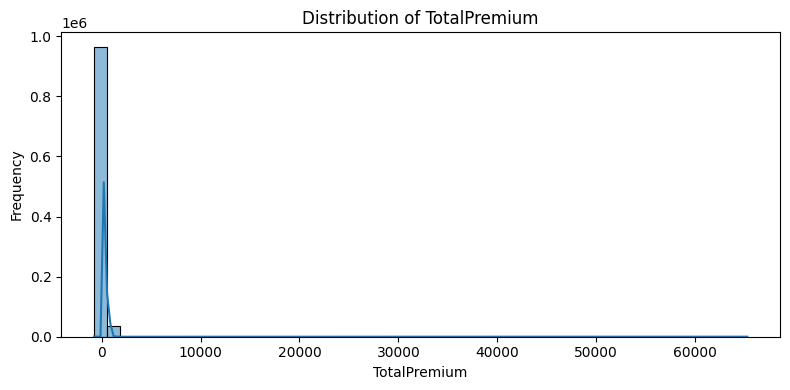

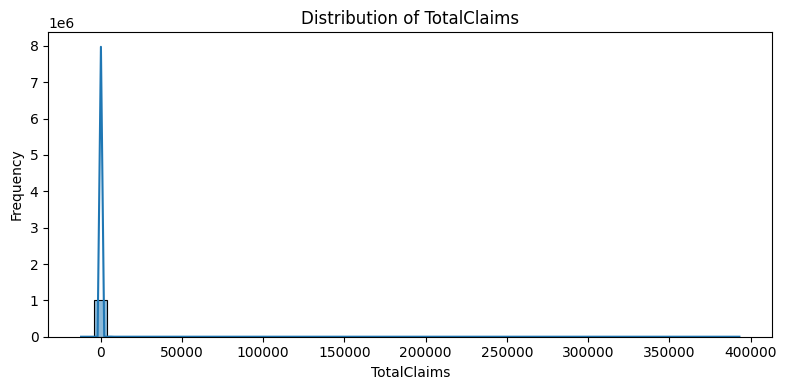

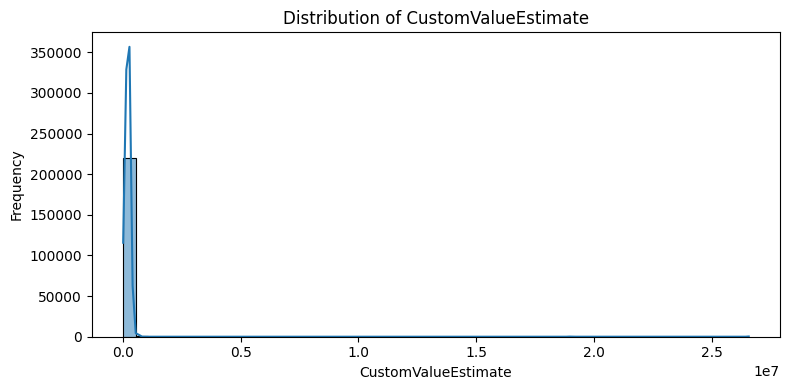

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select main financial numerical columns for inspection
num_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']

# Plot histograms
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


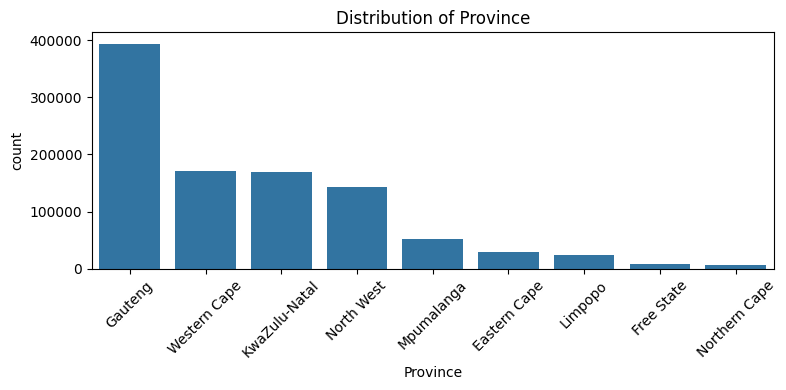

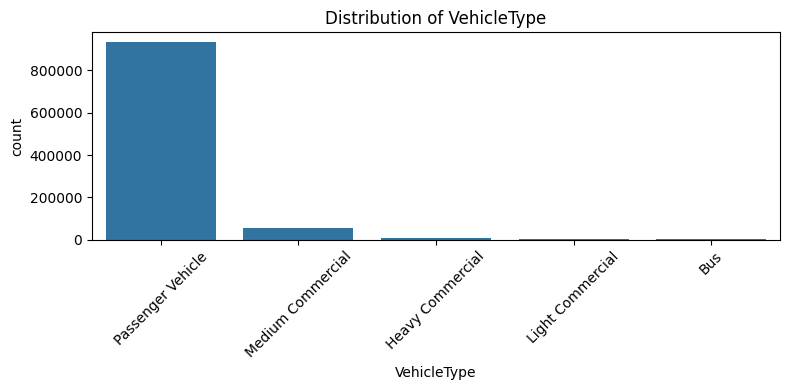

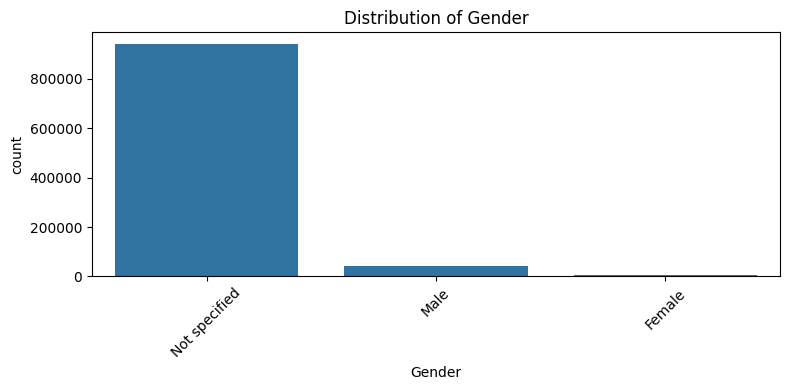

In [5]:
cat_cols = ['Province', 'VehicleType', 'Gender']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [6]:
# Avoid division by zero
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium'].replace(0, pd.NA)


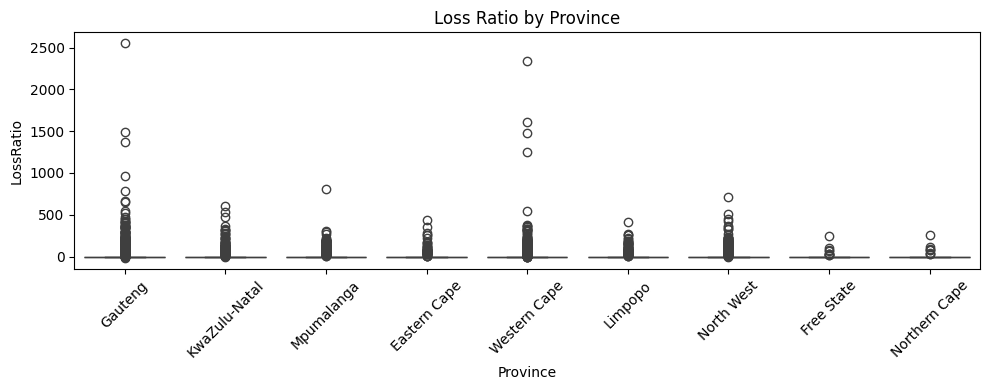

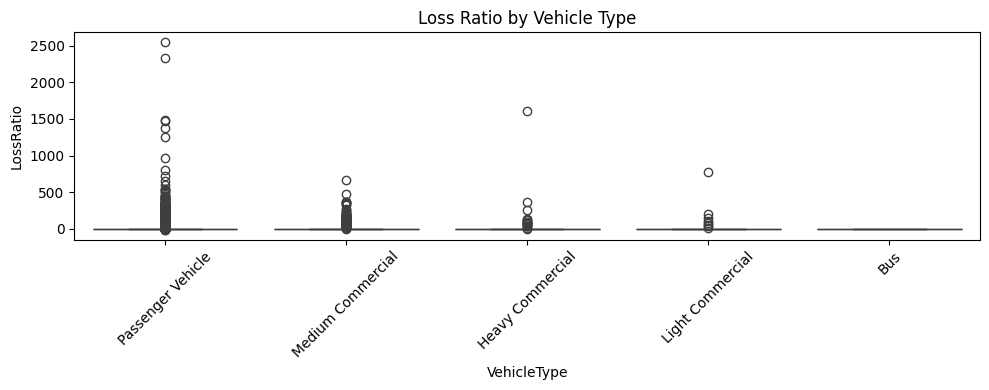

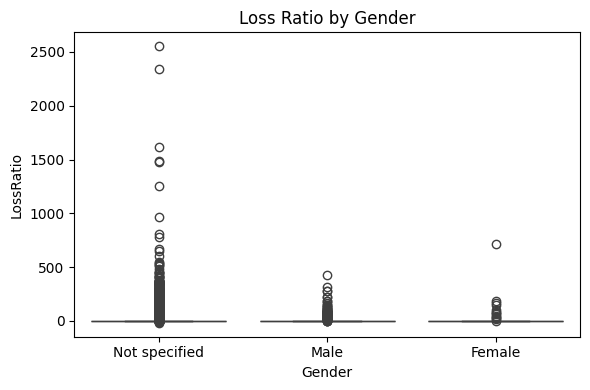

In [7]:
# LossRatio by Province
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='Province', y='LossRatio')
plt.title('Loss Ratio by Province')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# LossRatio by VehicleType
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x='VehicleType', y='LossRatio')
plt.title('Loss Ratio by Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# LossRatio by Gender
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Gender', y='LossRatio')
plt.title('Loss Ratio by Gender')
plt.tight_layout()
plt.show()


In [8]:
# Convert TransactionMonth to datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')

# Check for invalid parsing
print(df['TransactionMonth'].isnull().sum())


0


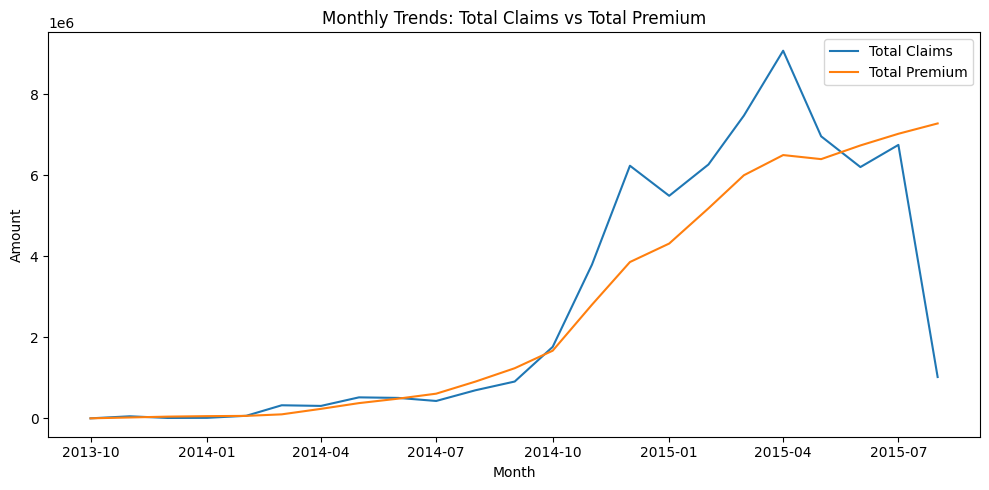

In [9]:
# Group by month
monthly_trends = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
}).reset_index()

# Convert period back to datetime for plotting
monthly_trends['TransactionMonth'] = monthly_trends['TransactionMonth'].dt.to_timestamp()

# Plotting trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trends, x='TransactionMonth', y='TotalClaims', label='Total Claims')
sns.lineplot(data=monthly_trends, x='TransactionMonth', y='TotalPremium', label='Total Premium')
plt.title('Monthly Trends: Total Claims vs Total Premium')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
# Group by make and Model and calculate average and total claims
vehicle_claims = df.groupby(['make', 'Model']).agg({
    'TotalClaims': ['mean', 'sum', 'count']
}).reset_index()

# Rename columns
vehicle_claims.columns = ['Make', 'Model', 'AvgClaims', 'TotalClaims', 'PolicyCount']

# Filter vehicles with at least 30 policies to avoid outliers
vehicle_claims = vehicle_claims[vehicle_claims['PolicyCount'] >= 30]

# Top 10 highest-claim vehicles
high_claims = vehicle_claims.sort_values(by='AvgClaims', ascending=False).head(10)

# Top 10 lowest-claim vehicles
low_claims = vehicle_claims.sort_values(by='AvgClaims').head(10)

print("Top 10 Highest-Claim Vehicles:")
print(high_claims[['Make', 'Model', 'AvgClaims']])

print("\nTop 10 Lowest-Claim Vehicles:")
print(low_claims[['Make', 'Model', 'AvgClaims']])


Top 10 Highest-Claim Vehicles:
                                    Make                        Model  \
311                               TOYOTA  L/CRUISER FJ 4.0 V6 CRUISER   
83                               HYUNDAI       H-1 2.5 CRDI WAGON A/T   
53                                  FIAT       DUCATO 2.3 JTD VETRATO   
394                           VOLKSWAGEN            POLO VIVO 1.6 5Dr   
130                        MERCEDES-BENZ                C180 BE COUPE   
162                        MERCEDES-BENZ        SPRINTER 312D F/C P/V   
246  SUZUKI                                             ERTIGA 1.4 GA   
337                               TOYOTA                 YARIS T1 3Dr   
4                                   AUDI  A4 1.8T S AVANT MULTITRONIC   
387                           VOLKSWAGEN         POLO 1.6 COMFORTLINE   

       AvgClaims  
311  5340.970273  
83   4118.181043  
53   1014.681021  
394   827.558882  
130   743.459027  
162   664.540138  
246   631.774519  
337   618.719

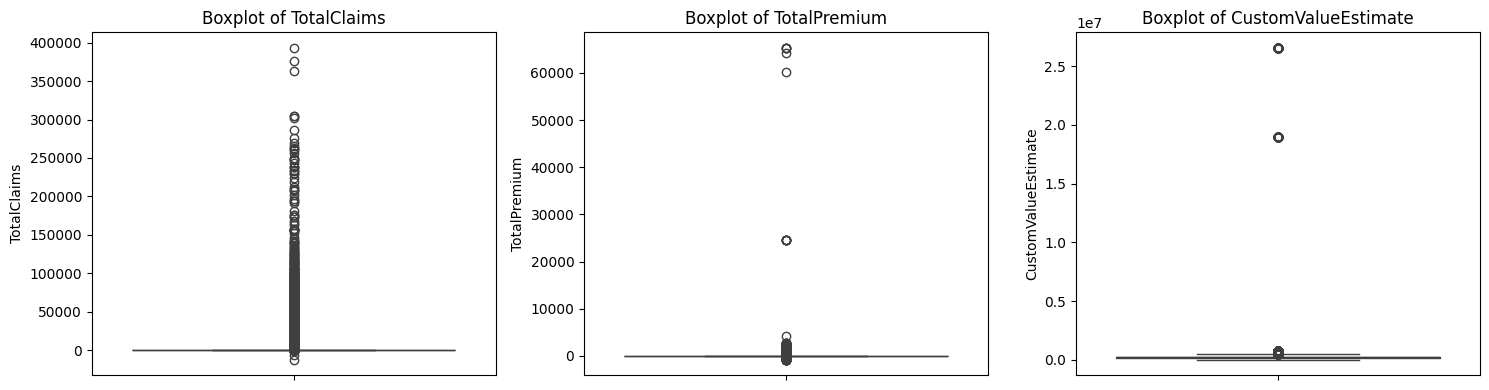

In [15]:
# List of key numeric columns
numeric_cols = ['TotalClaims', 'TotalPremium', 'CustomValueEstimate']

# Boxplots
plt.figure(figsize=(15, 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_13444\1173358514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_by_province.index, y=loss_by_province.values, palette='coolwarm')


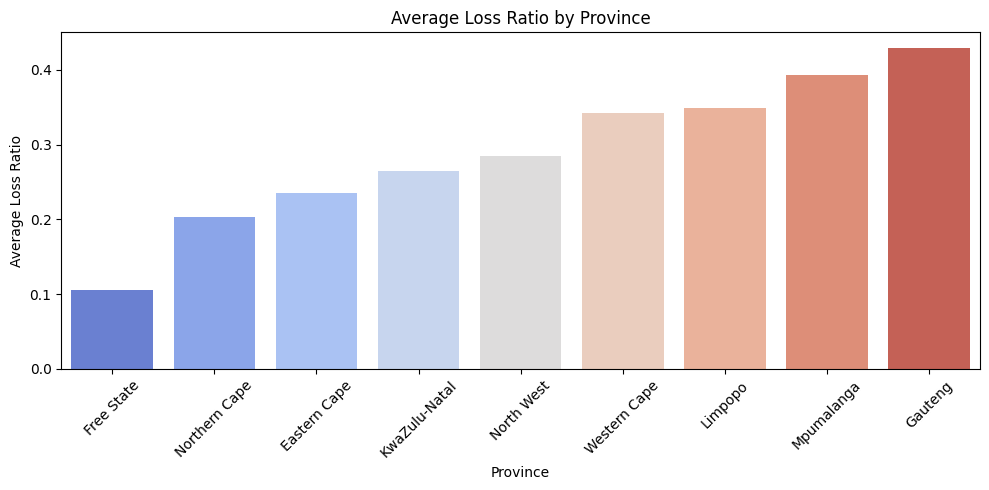

In [16]:
plt.figure(figsize=(10, 5))
loss_by_province = df.groupby('Province')['LossRatio'].mean().sort_values()
sns.barplot(x=loss_by_province.index, y=loss_by_province.values, palette='coolwarm')
plt.title('Average Loss Ratio by Province')
plt.ylabel('Average Loss Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


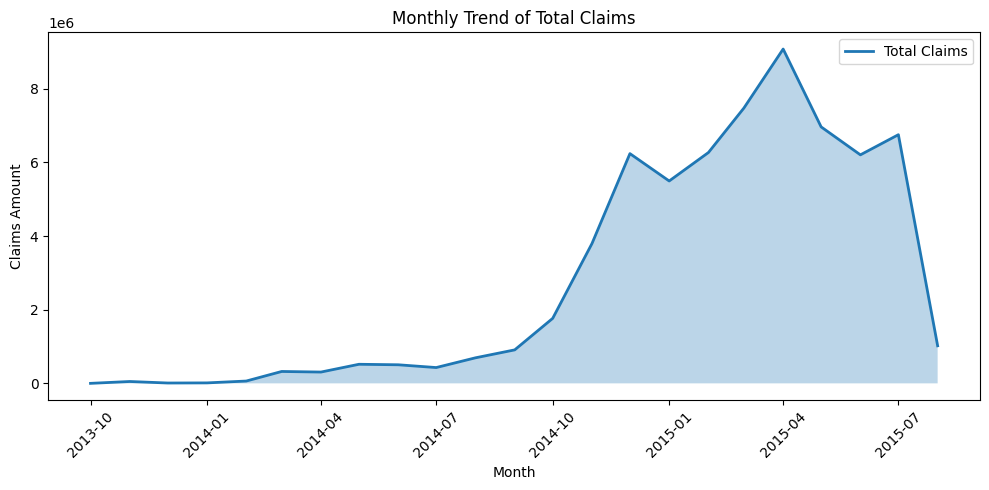

In [17]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trends, x='TransactionMonth', y='TotalClaims', label='Total Claims', linewidth=2)
plt.fill_between(monthly_trends['TransactionMonth'], monthly_trends['TotalClaims'], alpha=0.3)
plt.title('Monthly Trend of Total Claims')
plt.xlabel('Month')
plt.ylabel('Claims Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


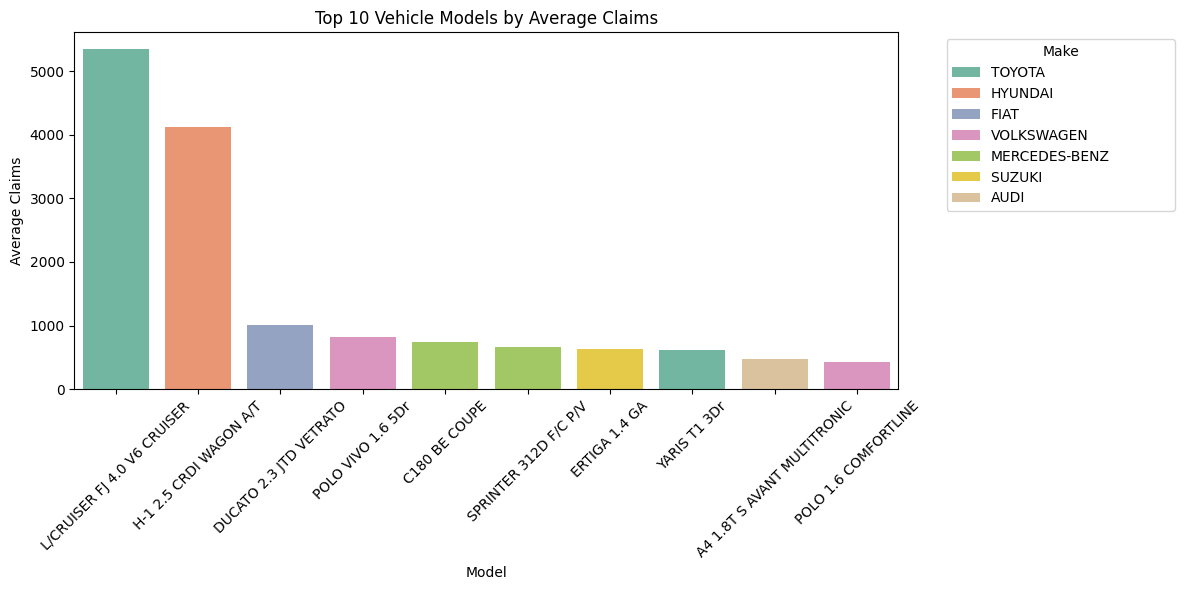

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=high_claims, x='Model', y='AvgClaims', hue='Make', dodge=False, palette='Set2')
plt.title('Top 10 Vehicle Models by Average Claims')
plt.ylabel('Average Claims')
plt.xticks(rotation=45)
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
